<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/calorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler # For feature scaling
from sklearn.cluster import KMeans # K-means clustering
import sklearn.metrics as metrics
from yellowbrick.cluster import SilhouetteVisualizer #silhouette visualizer

In [4]:
#import from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Data import# preparation
list = pd.read_csv('/content/drive/MyDrive/csv-files/calories-revised.csv',sep=';',engine='python')
list2 = list.copy()
#list2.head(10)
calval = list2.iloc[:,[0,1,3,6,9]].copy()
kjval = list2.iloc[:,[0,1,4,7,10]].copy()
#calval.head(10)
#to cluster determinaion

In [7]:
#2.a kmeans training
canalysis = calval.iloc[:,[2,3,4]].copy()
#canalysis.head(10)
xtrain2 = canalysis.values

#2.b Scaler
scaler = MinMaxScaler()
xtrainii = scaler.fit_transform(xtrain2)


In [12]:
#inspecting column
canalysis.describe()

,cal_value_(cal/100g or cal/100mL),cal_value_per_serving_(cal),cal_value_per_ounce_(cal/ounce)
count,2224.000000,2224.000000,2224.000000
mean,236.595773,214.834083,67.018885
std,187.046990,340.802955,53.915018
min,0.000000,0.000000,0.000000
25%,82.000000,66.000000,24.000000
50%,217.500000,131.000000,61.000000
75%,344.000000,254.000000,97.000000
max,1009.000000,7205.000000,300.000000


## Inspect
the base of this analysis is 'calorie analysis' in three condition
- per 100 unit
- per serving
- per ounce

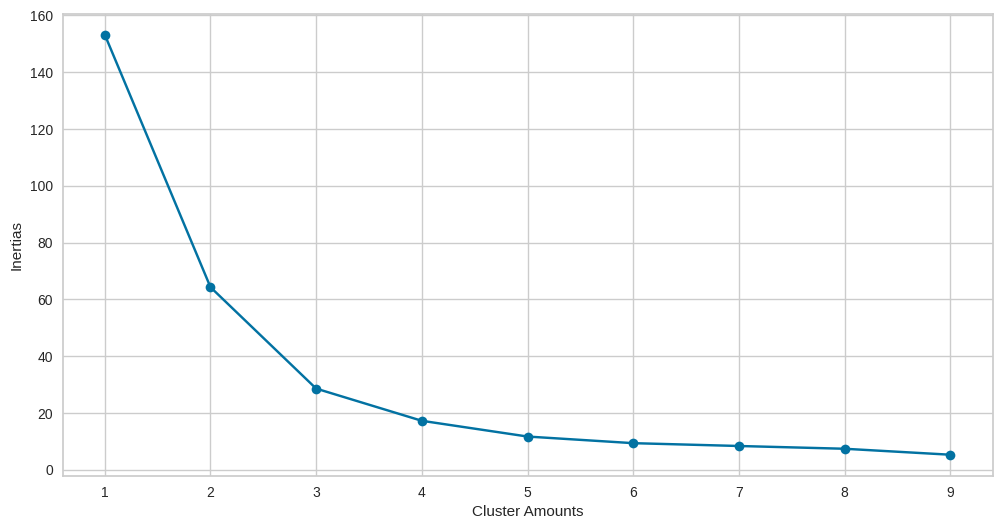

In [8]:
#3. cluster determination (elbow)
def kmeans_optimise (data, maxk):
    means = []
    inertias = []

    for k in range (1,maxk):
        kmean = KMeans(n_clusters= k)
        kmean.fit(data)

        means.append(k)
        inertias.append(kmean.inertia_)

    fig = plt.subplots(figsize = (12, 6))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Cluster Amounts')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()
kmeans_optimise(xtrainii, 10)


1 0
For k=2, the average silhouette score is 0.6258252027769896
1 1
For k=3, the average silhouette score is 0.517423524717746
2 0
For k=4, the average silhouette score is 0.4014204175827916
2 1
For k=5, the average silhouette score is 0.4654753971803524
3 0
For k=6, the average silhouette score is 0.47708272138598995
3 1
For k=7, the average silhouette score is 0.4968376668416316
4 0
For k=8, the average silhouette score is 0.47550968904381974
4 1
For k=9, the average silhouette score is 0.4394177752300148
5 0
For k=10, the average silhouette score is 0.4340468047465406


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.4014204175827916

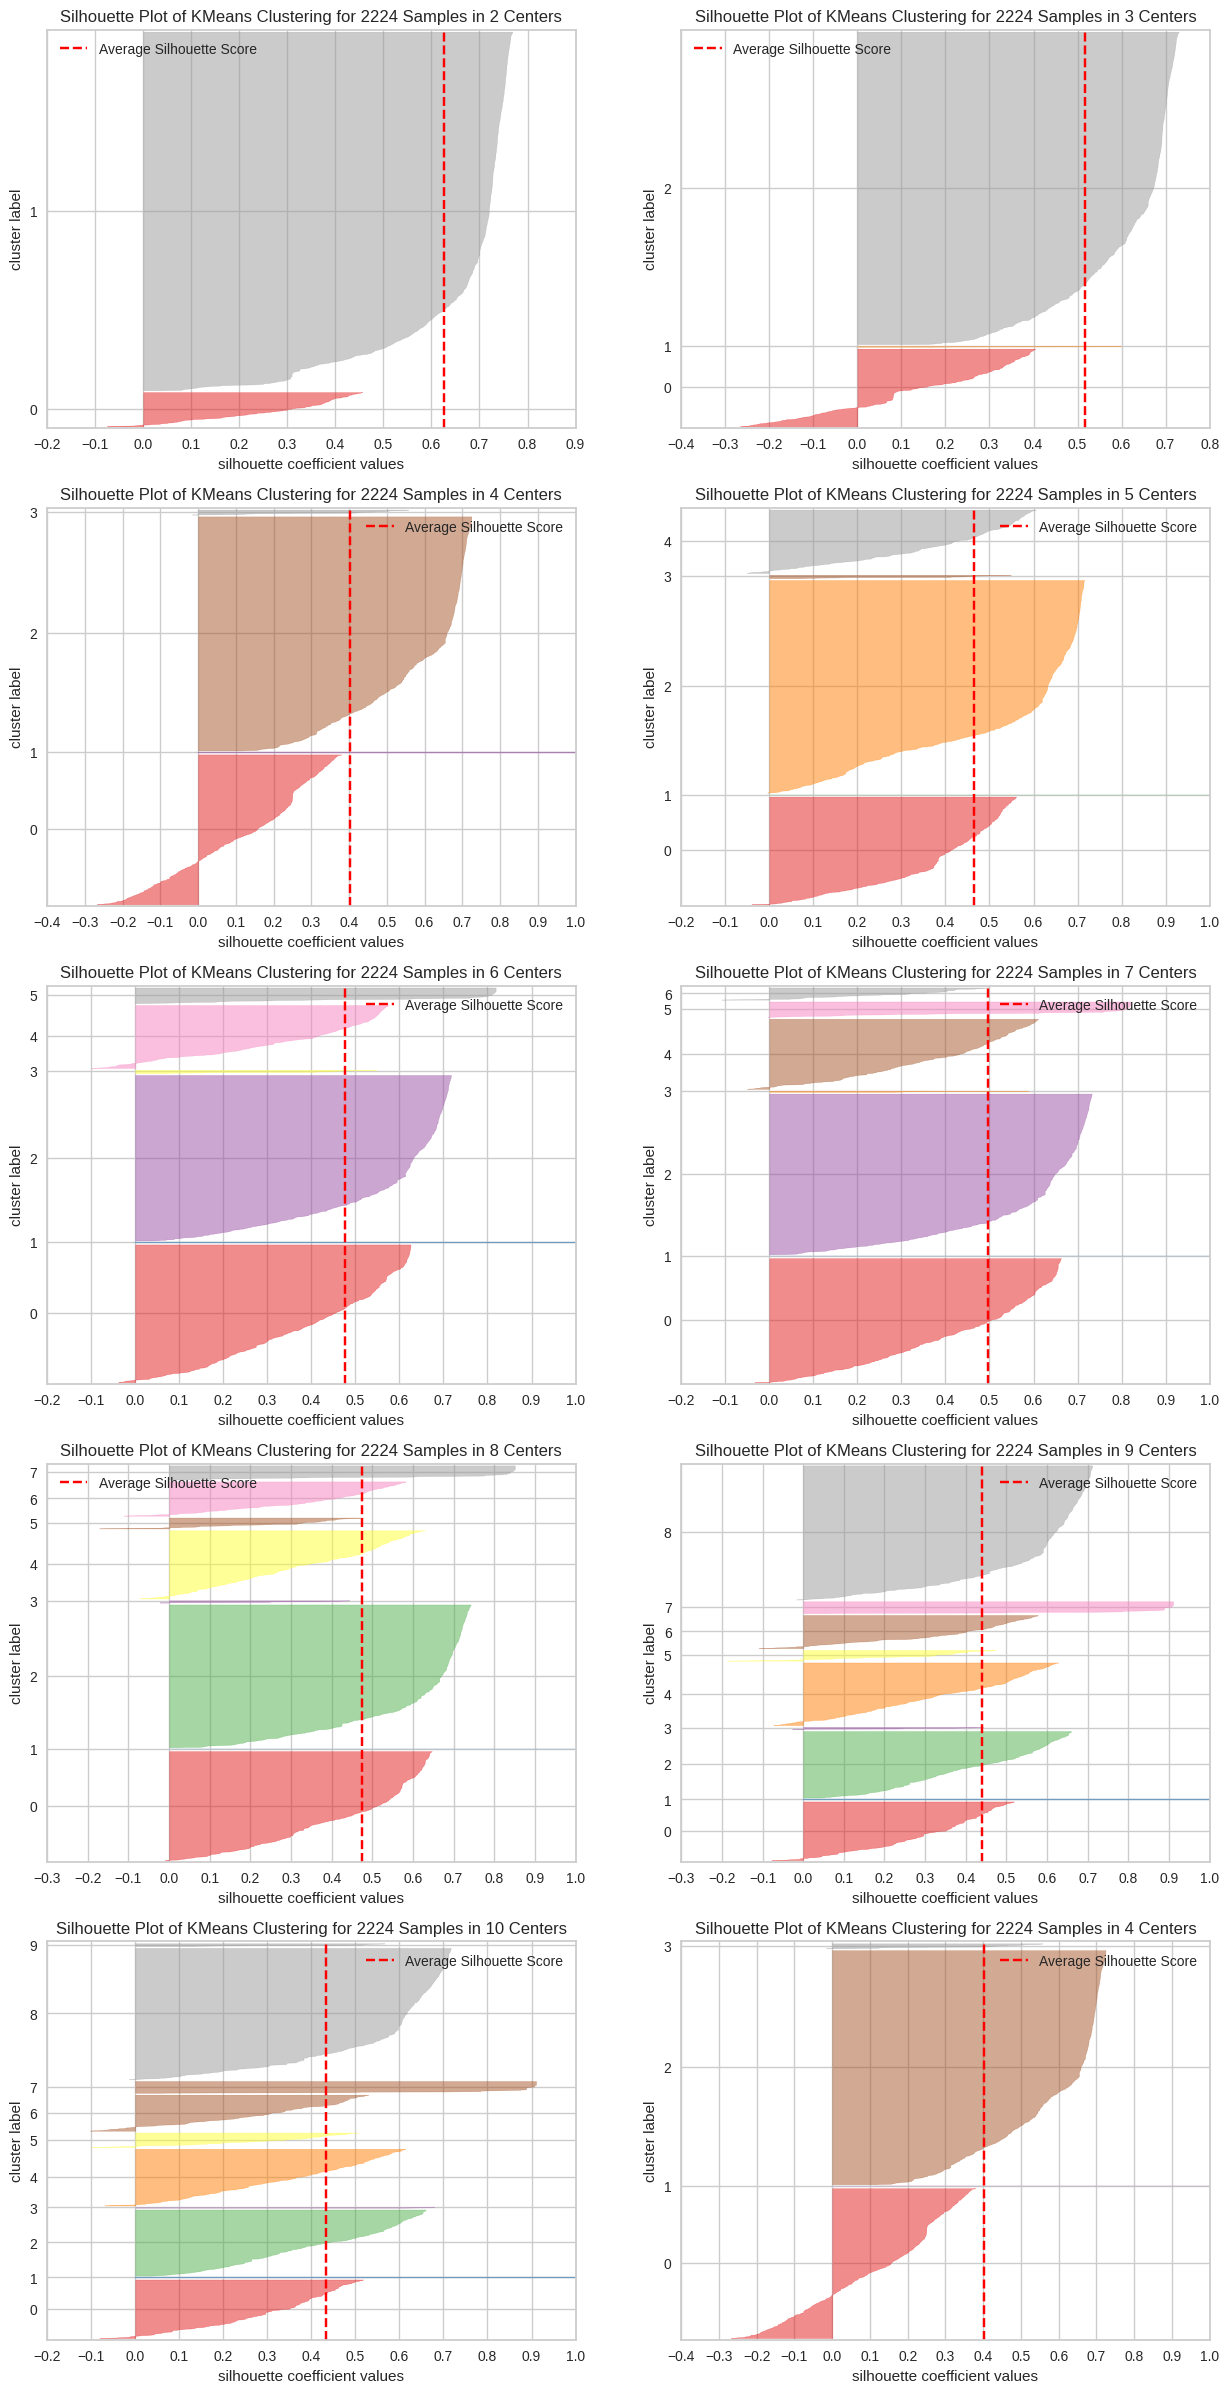

In [9]:
#silhouette method determination
K = range(2,11)
fig, ax = plt.subplots(5, 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(canalysis.values)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(canalysis.values)
  sil.finalize()
  print(q, mod)
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

#   checking 4 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 1000, n_init='auto')
cluster_model.fit(canalysis)

sil = SilhouetteVisualizer(cluster_model, is_fitted = True)
sil.fit(canalysis)
sil.finalize() # sama aja kaya .plot()
sil.silhouette_score_


In [10]:
#  3. cluster preparation
kmeany = KMeans(n_clusters= 4, random_state = 1000, n_init='auto')
#3a kmeans determination with declared clusters (n = 4)
ytrainii = kmeany.fit_predict(xtrainii)
#4. column creation
list2['Cluster'] = ytrainii
list2.groupby('Cluster')
list2
#5 renaming cluster
list2['Cluster'] = list2['Cluster'].replace([0,1,2,3],['Very low calorie Density','Low calorie density','Middle calorie density','High Calorie density'])
#list2.head(100)
#6.downloading data
list2.to_csv('calorie-data-completed.csv')
